<a href="https://colab.research.google.com/github/YangxuanWu/Python/blob/master/NewProjectInFall/ML-7/QOA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/")

Mounted at /content/drive


In [2]:
!ls

 1bot_feaure_pics
'1_importance_list_for_bot_attack (1).csv'
 1_importance_list_for_bot_attack.csv
 all_data.csv
 attacks
 Bot
 bot_feaure_pics
'Colab Notebooks'
 CSVs
 feaure_pics
 importance_list_all_data.csv
 importance_list_for_attack_files.csv
 importance_list_for_bot_attack_files.csv
 results


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Bot
Bot               QOA                0.68            0.74            0.77            0.68            0.006          


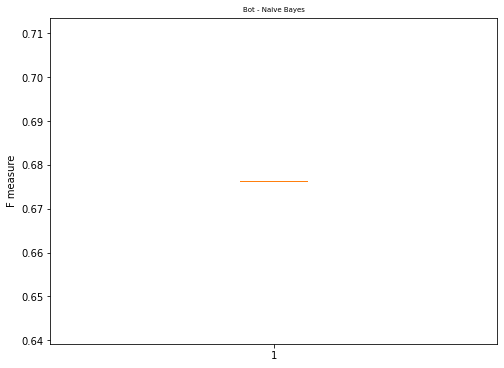


------------------------------------------------------------------------------------------------------


mission accomplished!
Total operation time: =  0.2604970932006836 seconds


In [45]:
##5.1 “all_data。程序的操作需要csv文件。
# #”all_data。csv文件必须位于与程序相同的目录中。
##这个程序的目的是将机器学习算法应用到数据集，并观察算法的性能。使用的算法有:Naive Bayes, QDA, Random Forest, ID3, AdaBoost, MLP, Nearest neighbour
##作为程序显示输出的数据包括:文件名、机器学习算法名称、准确率、精度、召回率、f1得分、时间
##该程序将创建一个CSV文件，该文件将打印结果和包含结果的文件夹

##  the some codes parts used for calculation and graphing are taken from the following site.
##  http://scikit-learn.org


from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline
import os
import pandas as pd
import csv
import time
import warnings
import math
warnings.filterwarnings("ignore")


result="./results/results_1.csv" #a CSV file is named in which the results are saved.
csv_files=os.listdir("Bot")# 获取攻击文件夹中的文件名称并分配给一个列表(csv_files)。
path="./attacks/Bot.csv"
repetition=10


def folder(f_name): #this function creates a folder named "results" and "result_graph_1" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")


folder_name="./results/bot_result_graph_1/"
folder(folder_name)


#The machine learning algorithms to be used are defined in a dictionary (ml_list).
#ml_list={
#"Naive Bayes":GaussianNB()
#"QDA":QDA()
#"Random Forest":RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#"ID3" :DecisionTreeClassifier(max_depth=5,criterion="entropy"),
#"AdaBoost":AdaBoostClassifier(),
#"MLP":MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500),
#"Nearest Neighbors":KNeighborsClassifier(3)}



# the features to be used for each attack type is defined in a dictionary(features).
# the first 4 of the features created by the file "04_1_feature_selection_for_attack_files.py" are used here.
features={"Bot":["Bwd Packet Length Mean","Flow IAT Max","Flow Duration","Flow IAT Min","Label"]}

seconds=time.time()#time stamp for all processing time

for j in csv_files: #this loop runs on the list containing the filenames.Operations are repeated for all attack files
    print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File","ML algorithm","accuracy","Precision", "Recall" , "F1-score","Time"))# print output header
    
    
    feature_list=list(features[j[0:-4]])
    df=pd.read_csv(path
                   ,usecols=feature_list)#read an attack file.
    print(j[0:-4])
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]: #it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    for col in feature_list:
      m = df.loc[df[col] != np.inf, col].max()
      df[col].replace(np.inf, m, inplace = True)

    y = df["Label"] #this section separates the label and the data into two separate pieces, as Label=y Data=X 
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]

    
    
    for i in range(repetition): # This loop allows cross-validation and machine learning algorithm to be repeated 10 times
          second=time.time()#time stamp for processing time

            # cross-validation
          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = repetition)#  So, in total there are 4 tracks: training data(X_train), training tag (y_train), test data(X_test) and test tag(y_test).


            #machine learning algorithm is applied in this section
          clf = QDA()#choose algorithm from ml_list dictionary                                                                          
          clf.fit(X_train, y_train)
          predict =clf.predict(X_test)
            #makes "classification report" and assigns the precision, f-measure, and recall values.s.    
                  
          f_1=f1_score(y_test, predict, average='macro')
          pr=precision_score(y_test, predict, average='macro')
          rc=recall_score(y_test, predict, average='macro')

            
            
            
          precision=[]
          recall=[]
          f1=[]
          accuracy=[]
          t_time=[]  
          precision.append(float(pr))
          recall.append(float(rc))
          f1.append(float(f_1))
          accuracy.append(clf.score(X_test, y_test))
          t_time.append(float((time.time()-second)) )


            
    print ('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4],"QOA" ,str(round(np.mean(accuracy),2)),str(round(np.mean(precision),2)), 
            str(round(np.mean(recall),2)),str(round(np.mean(f1),2)),str(round(np.mean(t_time),4))))#the result of the ten repetitions is printed on the screen.

    with open(result, "a", newline="",encoding="utf-8") as f: # all the values found are saved in the opened file.
            wrt = csv.writer(f)
            for i in range(0,len(t_time)):
                wrt.writerow([j[0:-4],ii,accuracy[i],precision[i],recall[i],f1[i],t_time[i]])#file name, algorithm name, precision, recall and f-measure are writed in CSV file
    a=[]
    a.append(f1)


     # 将为机器学习算法的结果创建方框图形并保存在feaure_graph文件夹中。
    ml=["Naive Bayes"]
    temp=0
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharey=True)
    axes.boxplot(a[temp] )
    axes.set_title(str(j[0:-4])+" - "+str(ml[temp]),fontsize=7)
    axes.set_ylabel(("F measure"))
    plt.savefig(folder_name+j[0:-4]+".pdf",bbox_inches='tight', papertype = 'a4', orientation = 'portrait', format = 'pdf')
    plt.show()
    print("\n------------------------------------------------------------------------------------------------------\n\n")
    
print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")